In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
data.head()

,nesta-1,nesta-2,nesta-4,nesta-5,nesta-6,nesta-7,nesta-8
timestamp,,,,,,,
2019-03-07 00:00:00,1.217778,1.245556,1.193333,1.414444,NaN,NaN,NaN
2019-03-07 00:15:00,1.433333,1.495556,1.410000,1.496667,NaN,NaN,NaN
2019-03-07 00:30:00,1.784444,1.661111,1.581111,1.682222,NaN,NaN,NaN
2019-03-07 00:45:00,1.804444,1.753333,1.492222,1.642222,NaN,NaN,NaN
2019-03-07 01:00:00,1.761111,1.816667,1.648889,1.610000,NaN,NaN,NaN


In [8]:
def get_flo_data_new():
    flo_data = pd.read_csv('../Data/BS Sensors/20200630_data_dump_pm25_15min_pms_sps.csv',
                           parse_dates=[2], dayfirst=True)
    flo_data = flo_data.drop('Unnamed: 0', axis=1)
    flo_data = flo_data[['site', 'date_cut', 'pm25']]
    flo_data.columns = ['site', 'date', 'pm25']

    flo_data = flo_data.pivot(columns='site', index='date', values='pm25')

    flo_data.columns = [col.lower() for col in flo_data.columns]
    flo_data.index.name = 'timestamp'

    flo_data['nesta-2'] = flo_data['nesta-2'].combine_first(flo_data['nesta-2-1'])
    del flo_data['nesta-2-1']

    flo_data.loc['2019-06-07','nesta-1'] = np.nan

    hourly_mean = flo_data.resample('1H').mean()
    daily_mean = flo_data.resample('1D').mean()
    
    return flo_data, hourly_mean, daily_mean

In [9]:
data, hourly_mean, daily_mean = get_flo_data_new()

In [10]:
data.head()

,nesta-1,nesta-11,nesta-12,nesta-13,nesta-14,nesta-2,nesta-3,nesta-4,nesta-5,nesta-6,nesta-7,nesta-8,nesta-9
timestamp,,,,,,,,,,,,,
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
flo_data = pd.read_csv('../Data/BS Sensors/20200630_data_dump_pm25_15min_pms_sps.csv',
                           parse_dates=[2], dayfirst=True)
flo_data = flo_data.drop('Unnamed: 0', axis=1)
flo_data = flo_data[['site', 'date_cut', 'pm25']]
flo_data.columns = ['site', 'date', 'pm25']

In [15]:
pv = flo_data.pivot(columns='site', index='date', values='pm25')

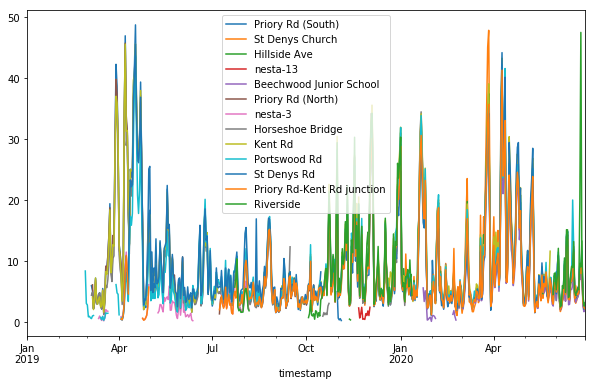

In [19]:
daily_mean.rename(columns=ID_to_name).plot(figsize=(10, 6))

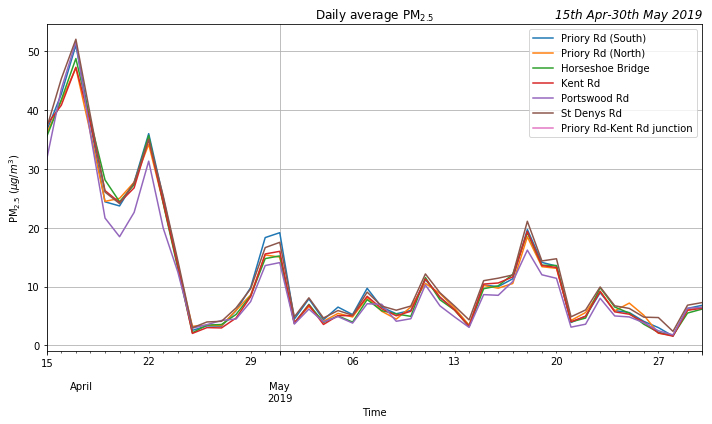

In [4]:
daily_mean['2019-04-15':'2019-05-30'].rename(columns=ID_to_name).plot(figsize=(10, 6))
#plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.annotate("April", xy=(70, 35), xycoords='figure points')
plt.title('Daily average $\mathrm{PM}_{2.5}$')
plt.title('15th Apr-30th May 2019', loc='right', fontstyle='italic')
plt.tight_layout()
#plt.savefig('graphs/AllSites_AprilMay.png', dpi=300)

In [5]:
daily_mean.index.min(), daily_mean.index.max()

(Timestamp('2019-03-07 00:00:00'), Timestamp('2019-08-23 00:00:00'))

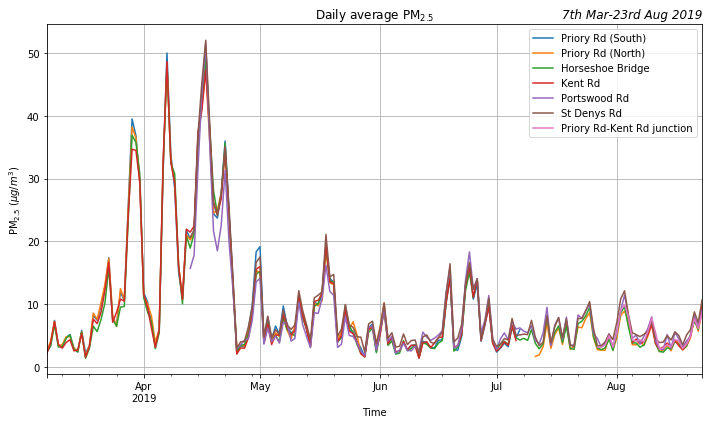

In [6]:
daily_mean.rename(columns=ID_to_name).plot(figsize=(10, 6))
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('Daily average $\mathrm{PM}_{2.5}$')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.tight_layout()
plt.savefig('graphs/AllSites_WholePeriod.png', dpi=300)

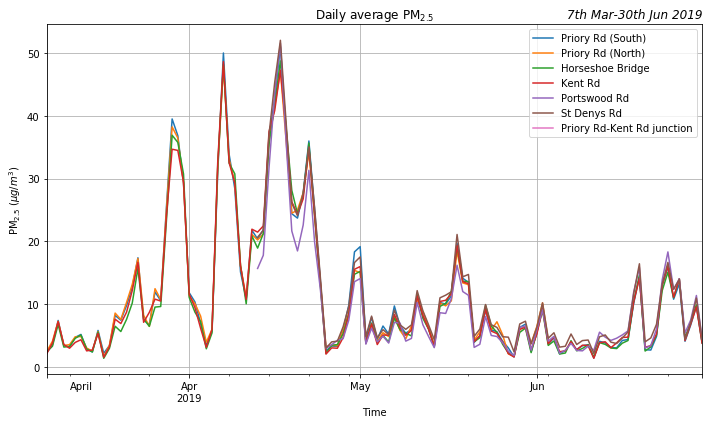

In [4]:
daily_mean['2019-03-07':'2019-06-30'].rename(columns=ID_to_name).plot(figsize=(10, 6))
#plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.annotate("April", xy=(70, 35), xycoords='figure points')
plt.title('Daily average $\mathrm{PM}_{2.5}$')
plt.title('7th Mar-30th Jun 2019', loc='right', fontstyle='italic')
plt.tight_layout()
plt.savefig('graphs/AllSites_PreSummer.png', dpi=300)